# 이미지 웹 크롤링 in 크롬

In [4]:
pip install --upgrade google-api-python-client

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\b8\f6\f5\b7bef1a5bc0e07ca4aa54c596b0b574c5afc07a9fddccf08f8
Successfully built google-api-python-client
Note: you may need to restart the kernel to use updated packages.


In [9]:

pip install google-cloud-vision

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\9e\3d\a2\1bec8bb7db80ab3216dbc33092bb7ccd0debfb8ba42b5668d5
Successfully built googleapis-common-protos
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install google.colab

  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\38\0d\59\701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\4a\45\47\1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\72\bf\f4\b68fa69596986881b397b18ff2b9af5f8181233aadcc9f76fd
Successfully built google.colab portpicker tornado
  Found existing installation: google-auth 1.6.3
    Uninstalling google-auth-1.6.3:
      Successfully uninstalled google-auth-1.6.3
  Found existing installation: prompt-toolkit 2.0.9
    Uninstalling prompt-toolkit-2.0.9:
      Successfully uninstalled prompt-toolkit-2.0.9
  Found existing installation: ipython 7.6.1
    Uninstalling ipython-7.6.1:
      Successfully uninstalled ipython-7.6.1
  Found existing installation: tornado 6.0.3
    Uninstalling tornado-6.0.3:
      Successfully uninstalled tornado-6.0.3
Note: you may need to restart the kernel to 

ERROR: spyder-kernels 0.5.1 has requirement ipykernel>=4.8.2, but you'll have ipykernel 4.6.1 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt_toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.18 which is incompatible.
ERROR: distributed 2.1.0 has requirement tornado>=5, but you'll have tornado 4.5.3 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\anaconda3\\lib\\site-packages\\~ornado\\speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [20]:
from google.colab import drive
drive.mount('/cnn/drive')

ModuleNotFoundError: No module named 'google.colab'

# 이미지 불러오기 및 resize

In [15]:
import glob

from PIL import Image
import numpy as np

In [35]:
top_images_jpg = glob.glob('상의/' + '*.jpg')
top_images_png = glob.glob('상의/' + '*.png')
top_images_jpeg = glob.glob('상의/' + '*.jpeg')

pants_images_jpg = glob.glob('하의/' + '*.jpg')
pants_images_png = glob.glob('하의/' + '*.png')
pants_images_jpeg = glob.glob('하의/' + '*.jpeg')

In [36]:
print(top_images_jpg[:5])
print('='*50)
print(pants_images_jpg[0:5])

['상의\\1.61nC7HXQUTL._UY606_.jpg', '상의\\1.blue-martha-cold-shoulder-top-in1911mtotopblu-162-front.jpg', '상의\\100.1228wbed3149i7314760_600_2.jpg', '상의\\101.product_100147_egret_1_400x.jpg', '상의\\102.Bow-Back-Top-Sweet-Pea_08010584_850.jpg']
[]


In [37]:
image_width = 64
image_height = 64

In [38]:
X = []
Y = []

a = [top_images_jpg, top_images_png, top_images_jpeg, pants_images_jpg, pants_images_png, pants_images_jpeg]

for idx, i in enumerate(a):
  if idx < 3:
    for i, f in enumerate(i):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_width, image_height))
      data = np.asarray(img)
      X.append(data)
      Y.append(1)
  else:
    for i, f in enumerate(i):
      img = Image.open(f)
      img = img.convert("RGB")
      img = img.resize((image_width, image_height))
      data = np.asarray(img)
      X.append(data)
      Y.append(0)

OSError: cannot identify image file '상의\\102.G24936_SBFit_longsleeve_DESK.jpg'

In [0]:
X[0:5]

[array([[[186, 191, 195],
         [190, 193, 198],
         [192, 195, 200],
         ...,
         [192, 193, 195],
         [192, 196, 197],
         [188, 192, 195]],
 
        [[191, 196, 200],
         [186, 189, 194],
         [180, 188, 191],
         ...,
         [194, 195, 197],
         [190, 191, 193],
         [192, 193, 195]],
 
        [[193, 198, 202],
         [190, 195, 199],
         [188, 193, 197],
         ...,
         [193, 194, 196],
         [188, 189, 193],
         [188, 192, 195]],
 
        ...,
 
        [[175, 178, 183],
         [184, 188, 191],
         [179, 184, 188],
         ...,
         [190, 191, 193],
         [188, 189, 191],
         [190, 191, 193]],
 
        [[179, 183, 186],
         [189, 193, 196],
         [185, 189, 192],
         ...,
         [188, 189, 191],
         [195, 196, 198],
         [181, 182, 184]],
 
        [[180, 185, 189],
         [184, 188, 191],
         [176, 181, 184],
         ...,
         [189, 190, 192],
  

In [0]:
Y[0:5]

[1, 1, 1, 1, 1]

# 데이터 분리 및 저장

In [0]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


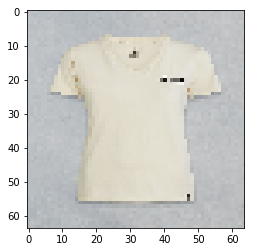

In [0]:
plt.imshow(X[0])

In [0]:
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(526, 64, 64, 3) (526,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)

In [0]:
np.save('clothes.npy', xy)

# 모델링

In [0]:
## 사용할 모델 라이브러리 import
import sys, os
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [0]:
# root_dir = ""
categories = ["top", "pants"]
nb_classes = len(categories)
image_size = 64

In [0]:
# 데이터 불러오기
def load_dataset():
  x_train, x_test, y_train, y_test = np.load("clothes.npy", allow_pickle=True)
  x_train = x_train.astype("float") / 256
  x_test = x_test.astype("float") / 256
  y_train = np_utils.to_categorical(y_train, nb_classes)
  y_test = np_utils.to_categorical(y_test, nb_classes)
  return x_train, x_test, y_train, y_test

In [0]:
?np.load

In [0]:
# 모델 구성 
def build_model(in_shape):
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, border_mode='same',
  input_shape=in_shape))
  model.add(Activation('Relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
#   model.add(Dropout(0.25)) # dropout
  model.add(Convolution2D(64, 3, 3, border_mode='same'))
  model.add(Activation('sigmoid'))
  model.add(Convolution2D(64, 3, 3))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # dropout
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('sigmoid'))
  # dropout
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))
  model.compile(loss='crossentropy',
  optimizer='Adam',
  metrics=['accuracy'])
  return model

In [0]:
?Convolution2D

In [0]:
?MaxPooling2D

In [0]:
# 모델 학습
def model_train(x, y):
  model = build_model(x.shape[1:])
  model.fit(x, y, batch_size=32, epochs=20)
  return model

In [0]:
# 모델 평가하기 
def model_eval(model, x, y):
  score = model.evaluate(x, y)
  print('loss=', score[0])
  print('accuracy=', score[1])

In [0]:
x_train, x_test, y_train, y_test = load_dataset()
model = model_train(x_train, y_train)
model_eval(model, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/20
394/394 [==============================] - 7s 18ms/step - loss: 8.5023 - acc: 0.4340
Epoch 2/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 3/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 4/20
394/394 [==============================] - 7s 17ms/step - loss: 9.0730 - acc: 0.4340
Epoch 5/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 6/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 7/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 8/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 9/20
394/394 [==============================] - 7s 17ms/step - loss: 9.0730 - acc: 0.4340
Epoch 10/20
394/394 [==============================] - 6s 16ms/step - loss: 9.0730 - acc: 0.4340
Epoch 11/20
394/394 [==================

In [0]:
# 모델 저장
model.save("clothes_model_01.h5")

# 예측

In [0]:
from keras.models import load_model
from PIL import Image

In [0]:
root_dir = "예측/"
image_files = [root_dir+"예측1.jpg", root_dir+"예측2.jpg"]

In [0]:
image_size = 64
nb_classes = len(image_files)
categories = ["top", "pants"]

In [0]:
X1 = []
files = []

# 이미지 불러오기
for fname in image_files:
  print(fname)
  img = Image.open(fname)
  img = img.convert("RGB")
  img = img.resize((image_size, image_size))
  in_data = np.asarray(img)
  in_data = in_data.astype("float") / 256
  X1.append(in_data)
  files.append(fname)
print(X1)
print(files)

예측/예측1.jpg
예측/예측2.jpg
[array([[[0.99609375, 0.99609375, 0.98046875],
        [0.99609375, 0.99609375, 0.98828125],
        [0.99609375, 0.99609375, 0.98828125],
        ...,
        [0.62890625, 0.6015625 , 0.5625    ],
        [0.78515625, 0.7578125 , 0.71875   ],
        [0.82421875, 0.796875  , 0.7578125 ]],

       [[0.99609375, 0.99609375, 0.98828125],
        [0.99609375, 0.99609375, 0.98046875],
        [0.99609375, 0.99609375, 0.98046875],
        ...,
        [0.73828125, 0.7109375 , 0.671875  ],
        [0.74609375, 0.71875   , 0.6796875 ],
        [0.671875  , 0.64453125, 0.60546875]],

       [[0.99609375, 0.99609375, 0.98828125],
        [0.99609375, 0.99609375, 0.98046875],
        [0.99609375, 0.99609375, 0.9765625 ],
        ...,
        [0.63671875, 0.609375  , 0.5703125 ],
        [0.7265625 , 0.69921875, 0.66015625],
        [0.73828125, 0.7109375 , 0.671875  ]],

       ...,

       [[0.9296875 , 0.9375    , 0.89453125],
        [0.9921875 , 0.9921875 , 0.984375  ],

In [0]:
X1 = np.array(X1)

# 모델 파일 읽어오기 
model = load_model('clothes_model_01.h5')

# 예측 실행 
pre = model.predict(X1)

# 예측 결과 출력 
for i, p in enumerate(pre):
  y = p.argmax()
  print("입력:", files[i])
  print("예측:", "[", y, "]", categories[y], "/ Score",p[y])

입력: 예측/예측1.jpg
예측: [ 0 ] top / Score 1.0
입력: 예측/예측2.jpg
예측: [ 0 ] top / Score 1.0


# 모델링 - ReLu